In [ ]:
import os
import glob
import torch
import gc

# # yolov5
---

## # yolov5 가져오기
---

In [ ]:
%cd /content/drive/MyDrive/workspace/study/3D_Object_detection
!git clone https://github.com/ultralytics/yolov5

/content/drive/MyDrive/workspace/study/3D_Object_detection
Cloning into 'yolov5'...
remote: Enumerating objects: 12344, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 12344 (delta 21), reused 29 (delta 15), pack-reused 12292
Receiving objects: 100% (12344/12344), 12.67 MiB | 6.84 MiB/s, done.
Resolving deltas: 100% (8490/8490), done.


## # 모듈 임포트
---

In [ ]:
%cd /content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5
!pip install -r requirements.txt  # install

/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.9 MB/s 


## # 사전학습된 모델 다운로드
---

In [1]:
import torch

# 사전 학습된 모델 뽑아내기
model = torch.hub.load('ultralytics/yolov5', 'yolov5l6')  # or yolov5n, yolov5x6, custom

/home/ubuntu/anaconda3/envs/spiner310/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in /home/ubuntu/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-8 Python-3.10.6 torch-1.12.1+cu102 CUDA:0 (Tesla T4, 15110MiB)

100%|██████████| 147M/147M [00:39<00:00, 3.95MB/s] 

Fusing layers... 
YOLOv5l6 summary: 476 layers, 76726332 parameters, 0 gradients
Adding AutoShape... 


## # 데이터에 맞춰 yaml 생성
---

In [18]:
import glob
from sklearn.model_selection import train_test_split

img_list = sorted(glob.glob('/data/NIA50/data/2-050_sensor_sample/camera/front/images/*.jpg'))

# train_temp, test_list = train_test_split(img_list, test_size = 0.2, random_state = 0)

# train_list, val_list = train_test_split(train_temp, test_size = 0.2, random_state = 0)

train_list, val_list = train_test_split(img_list, test_size = 0.8, random_state = 0)


with open('/data/NIA50/yolov5/nia50/train.txt', 'w') as f:
    f.write('\n'.join(train_list) + '\n')
    
with open('/data/NIA50/yolov5/nia50/val.txt', 'w') as f:
    f.write('\n'.join(val_list) + '\n')
    
# with open('/data/NIA50/yolov5/nia50/test.txt', 'w') as f:
#     f.write('\n'.join(test_list) + '\n')
    
# with open('')

## # cuda 확인
---

In [ ]:
# gpu 캐시 삭제

import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())

True
1
0


In [ ]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [ ]:
# gpu 할당

import os
import torch

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0, 1' # gpu 여러개 할당

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## # 훈련
---

In [ ]:
# 훈련

%cd /home/ubuntu/kimgh/yolov5
!python train.py --img 640 --batch 16 --epochs 3 --data ./data/kitti.yaml --cfg ./models/yolov5x_kitti.yaml --weights yolov5x.pt --optimizer Adam --name kitti_result

In [4]:
%cd /data/NIA50/yolov5
!python train.py --img 1280 --batch 16 --epochs 5 --data ./nia50/nia50.yaml --cfg ./nia50/yolov5l6.yaml --weights ./ckpt/yolov5l6.pt --optimizer Adam --name sample_result

/data/NIA50/yolov5
train: weights=./ckpt/yolov5l6.pt, cfg=./nia50/yolov5l6.yaml, data=./nia50/nia50.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=8, project=runs/train, name=sample_result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de88 Python-3.10.6 torch-1.12.1+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0

In [6]:
%cd /data/NIA50/yolov5

data = '/data/NIA50/yolov5/nia50/yolo_aivill48/data_yolo_aivill48.yaml'
model = '/data/NIA50/yolov5/nia50/yolo_aivill48/model_yolov5l6.yaml'
weights = '/data/NIA50/yolov5/ckpt/yolov5l6.pt'

!python train.py --img 640 --batch 16 --epochs 100 --data {data} --cfg {model} --weights {weights} --optimizer AdamW --name yolo_avill48_re --device 1,2

/data/NIA50/yolov5
train: weights=/data/NIA50/yolov5/ckpt/yolov5l6.pt, cfg=/data/NIA50/yolov5/nia50/yolo_aivill48/model_yolov5l6.yaml, data=/data/NIA50/yolov5/nia50/yolo_aivill48/data_yolo_aivill48.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=1,2, multi_scale=False, single_cls=False, optimizer=AdamW, sync_bn=False, workers=8, project=runs/train, name=yolo_avill48_re, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://gi

In [5]:
%cd /data/NIA50/yolov5

!python train.py --help

/data/NIA50/yolov5
usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE] [--imgsz IMGSZ]
                [--rect] [--resume [RESUME]] [--nosave] [--noval]
                [--noautoanchor] [--noplots] [--evolve [EVOLVE]]
                [--bucket BUCKET] [--cache [CACHE]] [--image-weights]
                [--device DEVICE] [--multi-scale] [--single-cls]
                [--optimizer {SGD,Adam,AdamW}] [--sync-bn] [--workers WORKERS]
                [--project PROJECT] [--name NAME] [--exist-ok] [--quad]
                [--cos-lr] [--label-smoothing LABEL_SMOOTHING]
                [--patience PATIENCE] [--freeze FREEZE [FREEZE ...]]
                [--save-period SAVE_PERIOD] [--seed SEED]
                [--local_rank LOCAL_RANK] [--entity ENTITY]
                [--upload_dataset [UPLOAD_DATASET]]
                [--bbox_interval BBOX_INTERVAL]
                [--artifact_alias ARTIFACT_ALIAS]

options:

## # 검증
---

In [ ]:
# 검증

%cd /home/ubuntu/kimgh/yolov5
!python val.py --weights ./runs/train/kitti_result3/weights/best.pt --data ./data/kitti.yaml --img 640

In [26]:
%cd /data/NIA50/yolov5
!python val.py --data ./nia50/nia50.yaml --weights ./ckpt/yolov5l6.pt --batch-size 15 --img 1280 --verbose --name sample_val --save-txt --save-conf --exist-ok --device 0,1,2

/data/NIA50/yolov5
val: data=./nia50/nia50.yaml, weights=['./ckpt/yolov5l6.pt'], batch_size=15, imgsz=1280, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=0,1,2, workers=8, single_cls=False, augment=False, verbose=True, save_txt=True, save_hybrid=False, save_conf=True, save_json=False, project=runs/val, name=sample_val, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v6.2-203-g6371de88 Python-3.10.6 torch-1.12.1+cu102 CUDA:0 (Tesla T4, 15110MiB)
                                                              CUDA:1 (Tesla T4, 15110MiB)
                                                              CUDA:2 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5l6 summary: 476 layers, 76726332 parameters, 0 gradients
val: Scanning '/data/NIA50/data/2-050_sensor_sample/camera/front/labels.cache' i
val: WARNING ⚠️ /data/NIA50/data/2-050_sensor_sample/camera/front/images/1639543832.875874043.jpg: 5 duplicate labels removed
                 Class     Images  Instances          P          R 

In [8]:
!python val.py --help

usage: val.py [-h] [--data DATA] [--weights WEIGHTS [WEIGHTS ...]]
              [--batch-size BATCH_SIZE] [--imgsz IMGSZ]
              [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
              [--max-det MAX_DET] [--task TASK] [--device DEVICE]
              [--workers WORKERS] [--single-cls] [--augment] [--verbose]
              [--save-txt] [--save-hybrid] [--save-conf] [--save-json]
              [--project PROJECT] [--name NAME] [--exist-ok] [--half] [--dnn]

options:
  -h, --help            show this help message and exit
  --data DATA           dataset.yaml path
  --weights WEIGHTS [WEIGHTS ...]
                        model path(s)
  --batch-size BATCH_SIZE
                        batch size
  --imgsz IMGSZ, --img IMGSZ, --img-size IMGSZ
                        inference size (pixels)
  --conf-thres CONF_THRES
                        confidence threshold
  --iou-thres IOU_THRES
                        NMS IoU threshold
  --max-det MAX_DET     maximum detections per image

## # 테스트
---

In [3]:
%cd /data/NIA50/yolov5

/data/NIA50/yolov5


In [ ]:
# 테스트

%cd /data/NIA50/yolov5

path = '/content/drive/MyDrive/workspace/study/3D_Object_detection/OpenPCDet/data/kittimot/training/image_02'
folder_list = sorted(os.listdir(path))

for folder_name in folder_list[:1]:
    source_path = path + '/' + folder_name
    !python detect.py --weights ./weights/yolo5s_kitti.pt --img 640 --conf 0.4 --source {source_path} --name {'train/' + folder_name} --data ./data/kitti.yaml \
        --save-txt --save-conf --exist-ok --device 0

In [8]:
%cd /data/NIA50/yolov5

source_path = '/data/NIA50/data/2-050_sensor_sample/camera/front/images'
weights = '/data/NIA50/yolov5/runs/train/yolo_avill48_re/weights/best.pt'
data = '/data/NIA50/yolov5/nia50/yolo_aivill48/data_yolo_aivill48.yaml'

!python detect.py --weights {weights} --img 960 1280 --conf 0.4 --source {source_path} --name sample_yolo_avill48_re --data {data} \
        --save-txt --save-conf --exist-ok --device 0,1,2,3

/data/NIA50/yolov5
detect: weights=['/data/NIA50/yolov5/runs/train/yolo_avill48_re/weights/best.pt'], source=/data/NIA50/data/2-050_sensor_sample/camera/front/images, data=/data/NIA50/yolov5/nia50/yolo_aivill48/data_yolo_aivill48.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=0,1,2,3, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=sample_yolo_avill48_re, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de88 Python-3.10.6 torch-1.12.1+cu102 CUDA:0 (Tesla T4, 15110MiB)
                                                              CUDA:1 (Tesla T4, 15110MiB)
                                                              CUDA:2 (Tesla T4, 15110MiB)
                                                              CUDA:3 (Tesla T4, 15110MiB)

Fusing laye

In [6]:
source_path = '/data/NIA50/data/2-050_sensor_sample/camera/front/images'
!python detect.py --weights ./ckpt/yolov5l6.pt --img 960 1280 --conf 0.4 --source {source_path} --name sample --classes 0 2 5 7 \
        --save-txt --save-conf --exist-ok --device 0,1,2

detect: weights=['./ckpt/yolov5l6.pt'], source=/data/NIA50/data/2-050_sensor_sample/camera/front/images, data=data/coco128.yaml, imgsz=[960, 1280], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=0,1,2, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=[0, 2, 5, 7], agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=sample, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de88 Python-3.10.6 torch-1.12.1+cu102 CUDA:0 (Tesla T4, 15110MiB)
                                                              CUDA:1 (Tesla T4, 15110MiB)
                                                              CUDA:2 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5l6 summary: 476 layers, 76726332 parameters, 0 gradients
image 1/100 /data/NIA50/data/2-050_sensor_sample/camera/front/images/1639543825.777566671.jpg: 960x1280 5 persons, 6 cars, 1 bus, 1 truc

In [5]:
!python detect.py --help

usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE]
                 [--data DATA] [--imgsz IMGSZ [IMGSZ ...]]
                 [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img]
                 [--save-txt] [--save-conf] [--save-crop] [--nosave]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms]
                 [--augment] [--visualize] [--update] [--project PROJECT]
                 [--name NAME] [--exist-ok] [--line-thickness LINE_THICKNESS]
                 [--hide-labels] [--hide-conf] [--half] [--dnn]
                 [--vid-stride VID_STRIDE]

options:
  -h, --help            show this help message and exit
  --weights WEIGHTS [WEIGHTS ...]
                        model path or triton URL
  --source SOURCE       file/dir/URL/glob/screen/0(webcam)
  --data DATA           (optional) dataset.yaml path
  --imgsz IMGSZ [IMGSZ ...], --img IMGSZ [IMGSZ ...], --img-size IMGSZ [IMG

## # 프레임 라벨 하나로 합치기
---

In [ ]:
# import glob
# from sklearn.model_selection import train_test_split

# img_list = sorted(glob.glob('/data/hwang/datasets/kitti/training/images/*.png'))

# train_list, val_list = train_test_split(img_list, test_size = 0.2, random_state = 0)

# with open('/home/ubuntu/kimgh/yolov5/kitti_yaml/train.txt', 'w') as f:
#     f.write('\n'.join(train_list) + '\n')
    
# with open('/home/ubuntu/kimgh/yolov5/kitti_yaml/val.txt', 'w') as f:
#     f.write('\n'.join(val_list) + '\n')

    
# # with open('')

In [ ]:
import pandas as pd
import re
import os

label_path = '/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5/runs/detect/train/0000/labels/'
frame_list = sorted(os.listdir(label_path))

label_df = pd.DataFrame()
for frame in frame_list:
    frame_num = int(re.search('[0-9]*', frame)[0])
    frame_df = pd.read_csv(label_path + frame, header = None, sep = ' ').replace(0, f'{frame_num}', regex = True)
    # frame_df = frame_df.replace(' ', ',', regex = True)

    label_df = pd.concat((label_df, frame_df), axis = 0)

label_df.to_csv('/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5/runs/detect/train/0000/0000.txt', index = None, header = None, sep = ',')

# # 로컬에서 모델 로드
---

In [ ]:
import cv2
import torch
import io
from PIL import Image

In [ ]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


HTTPError: ignored

In [ ]:
weights = '/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5/weights/yolo5s_kitti.pt'

# model = torch.hub.load('ultralystics/yolov5', 'yolov5s') # 깃에서 직접 불러오기
model = torch.hub.load('/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5', 'custom', path = weights, source = 'local') # 로컬에서 불러오기

In [ ]:
path = '/content/drive/MyDrive/workspace/study/3D_Object_detection/OpenPCDet/data/kittimot/training/image_02'
folder_list = sorted(os.listdir(path))

img = path + '/' + folder_list[0] + '/000000.png'

In [ ]:
results = model(img)

In [ ]:
df = results.pandas().xyxy[0]
df

,xmin,ymin,xmax,ymax,confidence,class,name
0,296.929321,159.425903,463.583405,290.025940,0.911835,0,Car
1,1109.494873,166.405472,1188.955933,311.626038,0.799027,3,Pedestrian
2,759.176270,167.032288,903.956604,368.379730,0.784215,5,Cyclist
3,296.880493,168.810913,462.718475,289.157623,0.363551,1,Van


In [ ]:
a = df.iloc[0][:4].values.astype('float')
list(a)

[296.9293212890625, 159.4259033203125, 463.5834045410156, 290.02593994140625]

In [69]:
import numpy as np

a = np.array([554, 791, 605, 884]) / 1.6
a = np.array([554, 776, 749, 879]) / 1.6
a = np.array([871, 862, 1180, 956]) / 1.6
# a = np.array([1494, 801, 1883, 909]) / 1.6

In [68]:
img = '/data/project50/1-cycle/camera/rear/1639543825.777566671.jpg'
img_.size

(1280, 960)

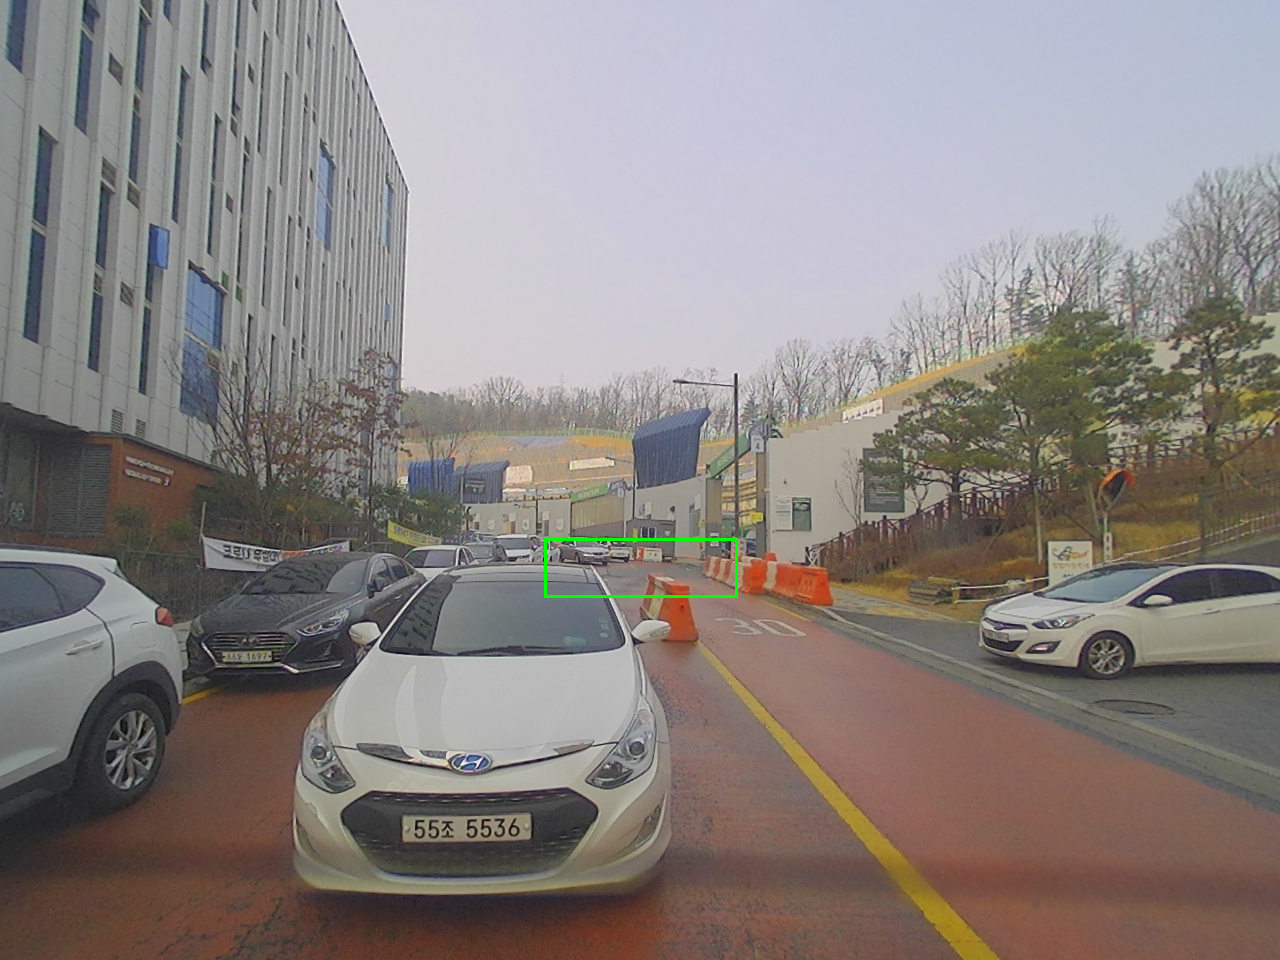

In [70]:
from PIL import Image, ImageDraw, ImageFont

img_ = Image.open(img).convert('RGB')

color = (0,255,0)

font_size = 15
# font = ImageFont.truetype('/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5/fonts/arial.ttf', 25) # arial.ttf 글씨체, font_size=15
font = ImageFont.load_default()
# box_color_RGBA  = (0,255,0,255)
# fill_color_RGBA = (0,255,0,50)
# draw = ImageDraw.Draw(img_, 'RGBA') # RGBA
# draw.rectangle((100,100,300,300), outline=box_color_RGBA, fill=fill_color_RGBA, width = 3)
# img_.show()

draw = ImageDraw.Draw(img_)
text_pos = (a[0], a[1]-27)
# draw.text(text_pos, f"{df['name'][0], round(df['confidence'][0], 2)}", fill = color, font = font, stroke_width = 1)
draw.rectangle(list(a), outline = color, width = 3)
# img_.show()

img_